## II.1

In [364]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from itertools import combinations
from numpy import square

In [365]:
df = pd.read_csv('clustering.csv', header = None)
df.rename(columns = {0:'x1',1:'x2'}, inplace = True)
df

,x1,x2
0,0.17978,-1.03430
1,-0.79447,-0.36758
2,-1.39200,-0.02695
3,-0.65219,-0.74951
4,-1.22590,1.76540
...,...,...
1995,4.67960,1.60930
1996,4.03430,0.97827
1997,7.43580,0.58226
1998,4.37940,0.76743


### Initial Scatter Plot of points

[Text(0.5, 0, 'x_1'), Text(0, 0.5, 'x_2')]

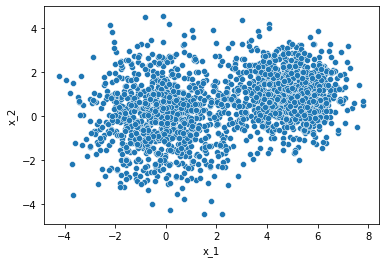

In [366]:
import seaborn as sns

scatter = sns.scatterplot(data = df, x = 'x1', y = 'x2')
scatter.set(xlabel = 'x_1', ylabel = 'x_2')

### K-centres

In [367]:
X = [] #list of 2 dimensional points in tuples
for i in range(len(df)):
    X.append((df['x1'][i],df['x2'][i]))

In [368]:
k = 5

In [369]:
def KCent(X):
    
    init_means = random.sample(X,1) #Arbitrarily pick a point as the starting centre
    
    centres = [i for i in init_means] #finds centres in C
    
    two_norm_i = {} #finds distances of all points to c1

    for i in X:
        two_norm_i[i] = np.linalg.norm(np.array(i)-np.array(centres[-1]))  #distances from xi to last c in the set  
            
            
    while (len(centres) < k):
                
        centres.append(max(two_norm_i, key = two_norm_i.get))
        del two_norm_i[max(two_norm_i, key = two_norm_i.get)]
        
            
    Q = np.matrix(centres)
    
    min_dist = {} #tracks minimum distance to nearest centre in Q from each xi
    min_cent = {} #tracks minimum distance cenre in Q for each xi
    
    
    for i in X:
        dist_i = {} #tracks distances from each xi to all centres in C.
        for j in centres:
            dist_i[j] = np.linalg.norm(np.array(i)-np.array(j))  #distances from xi to all cluster centres in Q 
            
        min_dist[i] = dist_i[min(dist_i, key = dist_i.get)]
        min_cent[i] = min(dist_i, key = dist_i.get)
                        
    Obj = min_dist[max(min_dist, key = min_dist.get)]
    
    
    return Q, Obj

In [392]:
Q, Obj = KCent(X)

Q = Q.tolist()

for i in range(len(Q)):
    Q[i] = tuple(Q[i])
print(Q)
print(Obj)

[(4.246, 1.6716), (-3.6773, -3.5965), (-3.7019, -2.1733), (-4.2148, 1.8237), (-2.6875, -3.0688)]
5.1022653576622226


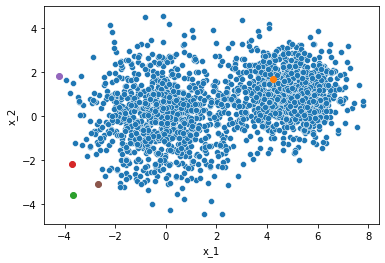

In [393]:
import seaborn as sns

scatter = sns.scatterplot(data = df, x = 'x1', y = 'x2')

for i in Q:
    plt.scatter(i[0], i[1])
    
scatter2 = sns.scatterplot()
scatter.set(xlabel = 'x_1', ylabel = 'x_2')
plt.show()

## II.2 - Method of Swaps

In [372]:
init_means = random.sample(X,1) #Arbitrarily pick a point as the starting centre

In [373]:
def Cent(X):
    
    centres = [i for i in init_means] #finds centres in C
    
    two_norm_i = {} #finds distances of all points to c1

    for i in X:
        two_norm_i[i] = np.linalg.norm(np.array(i)-np.array(centres[-1]))  #distances from xi to last c in the set  
            
            
    while (len(centres) < k):
                
        centres.append(max(two_norm_i, key = two_norm_i.get))
        del two_norm_i[max(two_norm_i, key = two_norm_i.get)]
        
            
    Q = np.matrix(centres)
    
    min_dist = {} #tracks minimum distance to nearest centre in Q from each xi
    min_cent = {} #tracks minimum distance cenre in Q for each xi
    
    
    for i in X:
        dist_i = {} #tracks distances from each xi to all centres in C.
        for j in centres:
            dist_i[j] = np.linalg.norm(np.array(i)-np.array(j))  #distances from xi to all cluster centres in Q 

        min_dist[i] = dist_i[min(dist_i, key = dist_i.get)]
        min_cent[i] = min(dist_i, key = dist_i.get)
    
    #p_ij - binary variable for cluster groupings calculation

    C_set = list(set(val for val in min_cent.values()))

    cluster = [[] for i in range(k)]


    for i in range(len(C_set)):
        for j in min_cent.keys():
            if min_cent[j] == C_set[i]:
                cluster[i].append(j)   #assigning all points to their respective clusters.

    C = []
    
    p = np.empty([len(X),k])

    for i in range(len(X)):
        for j in range(len(cluster)):
            if X[i] in cluster[j]:
                C.append(cluster.index(cluster[j]) + 1)

    for i in range(len(X)):
        for j in np.unique(C):
            if C[i] == j:
                p[i, (j-1)] = 1
            else:
                p[i, (j-1)] = 0
    return Q, centres, cluster

In [374]:
def p_cent(Q, centres):
    
    min_dist = {} #tracks minimum distance to nearest centre in Q from each xi
    min_cent = {} #tracks minimum distance cenre in Q for each xi
    
    
    for i in X:
        dist_i = {} #tracks distances from each xi to all centres in C.
        for j in centres:
            dist_i[j] = np.linalg.norm(np.array(i)-np.array(j))  #distances from xi to all cluster centres in Q 

        min_dist[i] = dist_i[min(dist_i, key = dist_i.get)]
        min_cent[i] = min(dist_i, key = dist_i.get)
    
    #p_ij - binary variable for cluster groupings calculation

    C_set = list(set(val for val in min_cent.values()))

    cluster = [[] for i in range(k)]


    for i in range(len(C_set)):
        for j in min_cent.keys():
            if min_cent[j] == C_set[i]:
                cluster[i].append(j)   #assigning all points to their respective clusters.

    C = []
    
    p = np.empty((len(X),k))

    for i in range(len(X)):
        for j in range(len(cluster)):
            if X[i] in cluster[j]:
                C.append(cluster.index(cluster[j]) + 1)

    for i in range(len(X)):
        for j in np.unique(C):
            if C[i] == j:
                p[i, (j-1)] = 1
            else:
                p[i, (j-1)] = 0
    return p

In [375]:
def Objective(Q,p,X):
    Obj = 0
    for j in range(len(Q)):
        for i in range(len(X)):
            Obj += np.linalg.norm(np.array(X[i]) - np.array(Q[j]))*p[i,j]
    Obj /= len(X) 
    
    return Obj

In [376]:
Q, centres, clusters = Cent(X)
P = p_cent(Q, centres)
Q = Q.tolist()

for i in range(len(Q)):
    Q[i] = tuple(Q[i])

In [377]:
O_obj = Objective(Q, p_cent(Q,centres), X)
print(O_obj)

Q_copy = Q
print(Q_copy)

6.973010190085477
[(5.6652, 2.7472), (-3.6773, -3.5965), (-3.7019, -2.1733), (-2.6875, -3.0688), (-3.5756, -1.2394)]


In [379]:
tau = 0.05
swap_attempts = 0
actual_swaps = 0

condition = True #binary variable to indicate if there is a cost improvement

Q_list = [Q_copy]

while(condition == True):
    
    closest_centres = {}
    for (i,j) in combinations(Q_copy,2):
        closest_centres[(i,j)] = np.linalg.norm(np.array(i) - np.array(j))

    best_pair = min(closest_centres, key = closest_centres.get) #searching for the 2 closest centres

    swaped_centre = random.choice(best_pair) #randomly select a centre to remove

    #calculating cost from Xs in each cluster to the swaped_centre
    cost_q = {}

    clusters_copy = clusters

    for i in clusters_copy:
        sum_i = 0
        for j in i:
            sum_i += np.linalg.norm(np.array(j) - np.array(swaped_centre))
        cost_q[clusters_copy.index(i) + 1] = sum_i

    max_partition = max(cost_q, key = cost_q.get) #partition with largest cost

    max_cost_partition = {} #objective value for each x in max_partition (distance from x to swapped_centre)
    for i in clusters_copy:
        if (clusters_copy.index(i) == max_partition - 1):
            for j in i:
                max_cost_partition[j] = np.linalg.norm(np.array(j) - np.array(swaped_centre))
                
    max_part_points = [] #points in max partition cluster
    
    for i in max_cost_partition.keys():
        max_part_points.append(i)
            
    Q_copy.remove(swaped_centre)
    Q_copy.append(random.choice(max_part_points))
    
    Q_list.append(Q_copy)
    
    swap_attempts += 1
    
    new_obj = Objective(Q_copy,p_cent(Q_copy,Q_copy),X)
    
    if (new_obj >= O_obj):
        Q_copy = Q_list[-2]
        continue
    
    if (new_obj <= (1-tau)*O_obj):
        actual_swaps += 1
        O_obj = new_obj
        condition = True
    else:
        Q_copy = Q_list[-1]
        condition = False

print('Final Q set:', Q_copy)
print('Final Objective Value = ', O_obj)
print('\n')
print('Number of attempted swaps = {} and # that improved objective = {}'. format(swap_attempts, actual_swaps))

Final Q set: [(-3.6773, -3.5965), (6.1586, -1.4323), (6.5943, 2.0786), (0.15238, -0.25201), (4.5854, 1.13)]
Final Objective Value =  1.4322755273377694


Number of attempted swaps = 243 and # that improved objective = 6


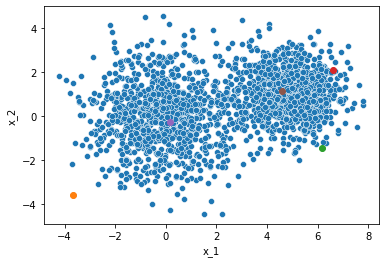

In [380]:
import seaborn as sns

scatter = sns.scatterplot(data = df, x = 'x1', y = 'x2')

for i in Q_copy:
    plt.scatter(i[0], i[1])
    
scatter2 = sns.scatterplot()
scatter.set(xlabel = 'x_1', ylabel = 'x_2')
plt.show()